In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Cleaned.csv')

In [3]:
data

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,4,8,6,3,8,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,512,4,3,8,8,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,513,2,4,8,8,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,514,7,4,8,8,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
data_ = data.corr()
data_

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
Unnamed: 0,1.000000,0.002007,0.048288,0.058491,0.010645,0.054135,0.374831,0.142278,0.052542,0.201275,0.116645,0.027631,0.101648,0.077550
X,0.002007,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.048288,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,0.058491,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,0.010645,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,0.054135,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.374831,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.142278,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.052542,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.201275,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844


<Axes: >

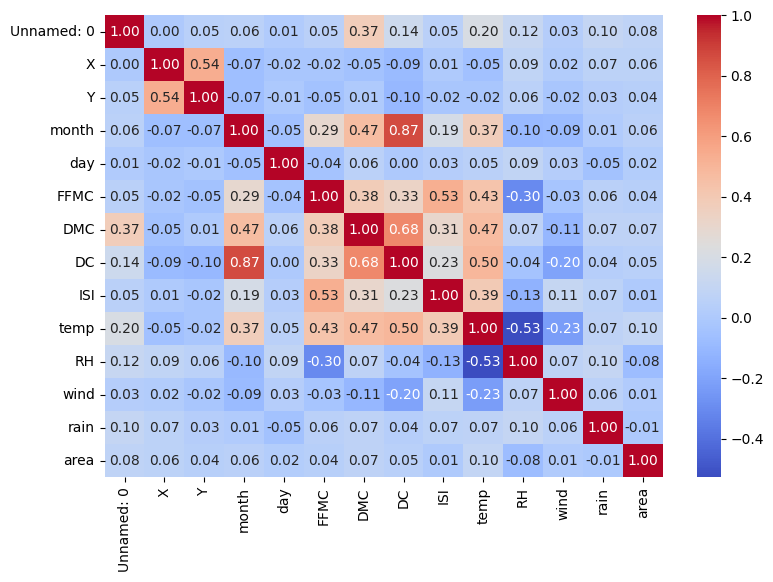

In [13]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_, annot=True, cmap='coolwarm', fmt=".2f")

In [14]:
import numpy as np

upper = data_.where(np.triu(np.ones(data_.shape), k=1).astype(bool))
drop = [column for column in upper.columns if any(upper[column] > 0.8)]
data = data.drop(columns=drop)

In [15]:
class LinearRegression:
    def __init__(self):
        self.weight = None
    
    def fit(self, X, y):
        first = np.dot(X.T, X)
        invert_mat = np.linalg.inv(first)
        self.weight = (invert_mat @ X.T) @ y 

    def delta(self, y, y_hat):
        return y - y_hat
    
    def rmse(self, X, y):
        y_hat = self.predict(X)
        return np.sqrt(np.mean(self.delta(y, y_hat) ** 2))
    
    def predict(self, X):
        return np.dot(X, self.weight)

In [16]:
X_train, X_test  = np.array_split(data, [int(0.8 * len(data))])

c:\Users\ply58\anaconda3\envs\machinelearning\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [17]:
y_train = X_train['area']
y_test = X_test['area']
X_train = X_train.drop(columns='area')
X_test = X_test.drop(columns='area')

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [19]:
for w in lr.weight:
    print(f"{w:.20f}")

0.03273068877199520471
0.98339988336725292495
-0.28073369639189243996
0.98704841120411068722
1.81020807200154121297
-0.06495128692526085101
0.05635757132707886613
-0.75820347048120617650
0.15930906709242687036
-0.30022407676482287808
0.34302637038541994308
-9.73477831095102885683


In [20]:
print(f"{lr.rmse(X_test, y_test):.20f}")

79.75419863389697638922
